In [1]:
import pandas as pd
from my_utils import *
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 윈도우

In [3]:
url = 'http://openAPI.seoul.go.kr:8088/(인증키)/xml/TimeAverageAirQuality/1/100/20231226/종로구'

In [6]:
df =get_df(url)

In [7]:
df.drop(columns='MSRSTE_NM',inplace = True)

In [10]:
df.set_index('MSRDT',inplace=True)

Text(0.5, 1.0, '종로구 시간별 오염 수치')

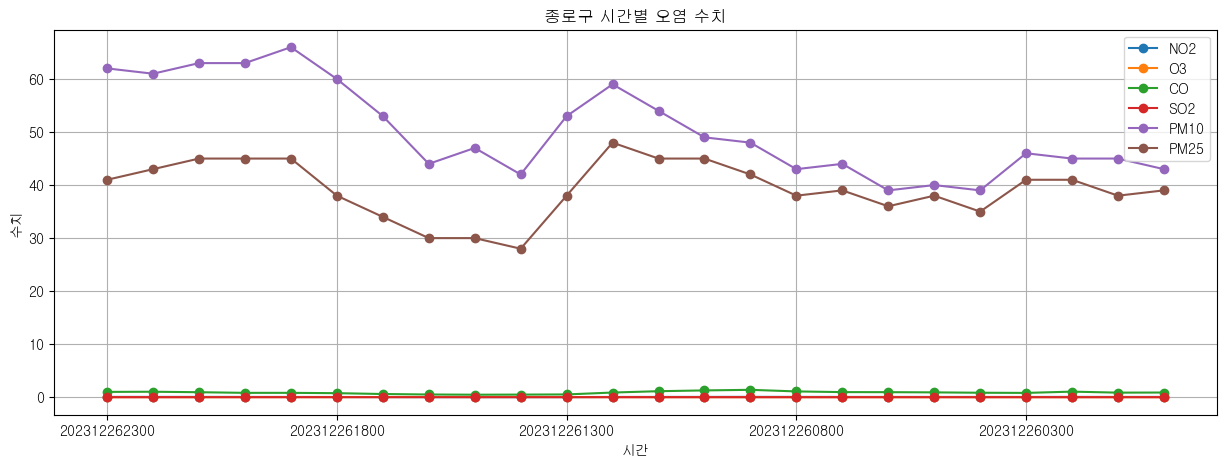

In [13]:
df.plot(figsize = (15,5),legend = True, marker = 'o',rot = 0)
plt.grid(True)
plt.xlabel('시간')
plt.ylabel('수치')
plt.title('종로구 시간별 오염 수치')

In [14]:
tmp = df[['NO2','O3',"SO2"]]

Text(0.5, 1.0, '종로구 시간별 오염 수치')

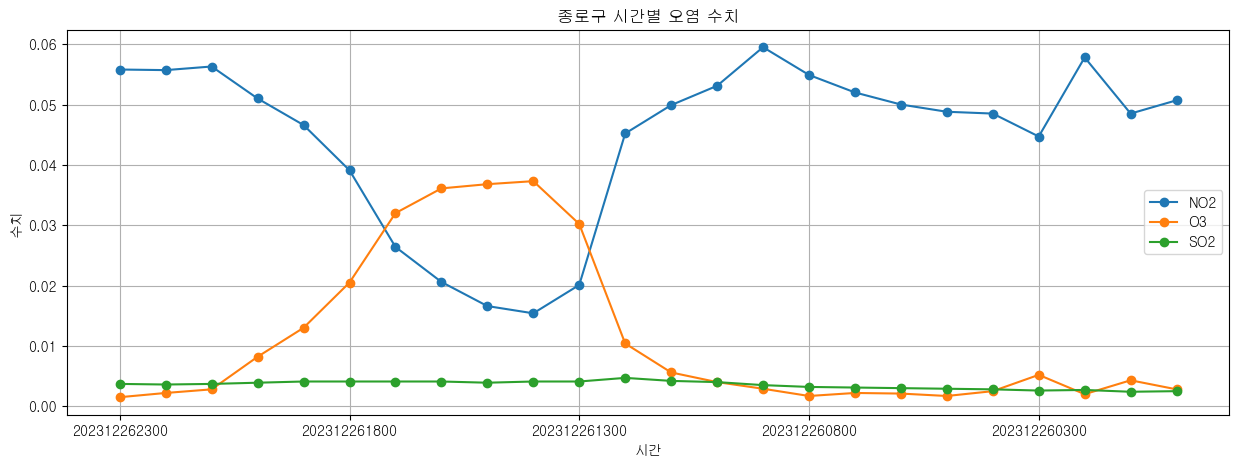

In [17]:
tmp.plot(figsize = (15,5),legend = True, marker = 'o',rot = 0)
plt.grid(True)
plt.xlabel('시간')
plt.ylabel('수치')
plt.title('종로구 시간별 오염 수치')

In [21]:
xdata = df.NO2
ydata = df.PM10
ydata2 = df.PM25

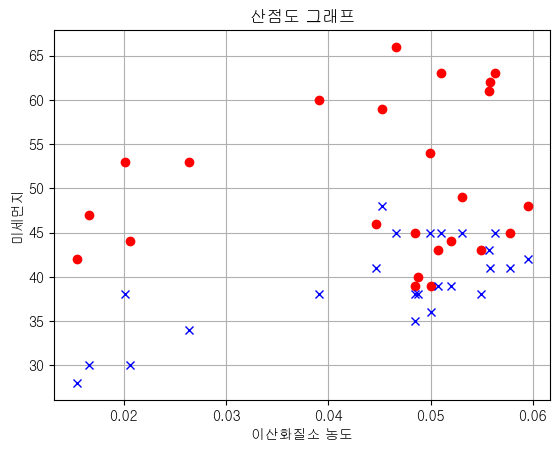

In [25]:
plt.figure()
plt.plot(xdata,ydata,color='r',marker='o',linestyle='none')
plt.plot(xdata,ydata2,color='b',marker='x',linestyle='none')
plt.xlabel('이산화질소 농도')
plt.ylabel('미세먼지')
plt.title('산점도 그래프')
plt.grid(True)

In [ ]:
7시간 동안의 미세먼지에 따른 bar 그래프 그리기

In [26]:
df.reset_index(inplace=True)

In [32]:
df = df[::1]

In [33]:
x_data = df.MSRDT[:7]
y_data = df.PM10[:7]

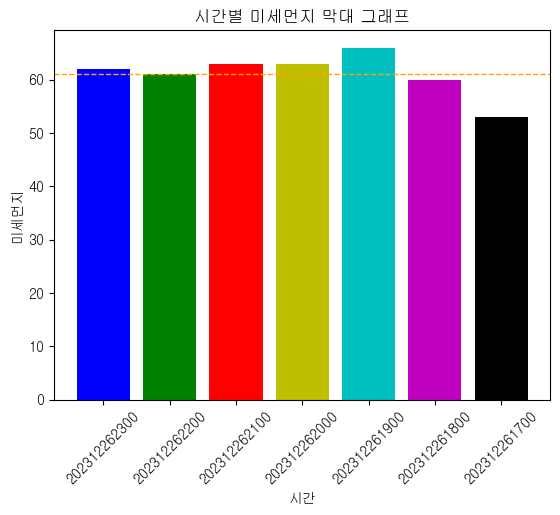

In [41]:
plt.figure()
plt.bar(x_data,y_data,color =['b','g','r','y','c','m','k'])
plt.xticks(rotation = 45)
plt.xlabel('시간')
plt.ylabel('미세먼지')
plt.title('시간별 미세먼지 막대 그래프')

mean_val = df.PM10[:7].mean()
plt.axhline(y=mean_val, color = 'orange',linewidth = 1,linestyle = 'dashed')

In [42]:
mean_val

61.142857142857146

(array([1., 1., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 3., 2., 2., 1.,
        1., 1., 2., 1., 1., 1.]),
 array([0.0154   , 0.0165025, 0.017605 , 0.0187075, 0.01981  , 0.0209125,
        0.022015 , 0.0231175, 0.02422  , 0.0253225, 0.026425 , 0.0275275,
        0.02863  , 0.0297325, 0.030835 , 0.0319375, 0.03304  , 0.0341425,
        0.035245 , 0.0363475, 0.03745  , 0.0385525, 0.039655 , 0.0407575,
        0.04186  , 0.0429625, 0.044065 , 0.0451675, 0.04627  , 0.0473725,
        0.048475 , 0.0495775, 0.05068  , 0.0517825, 0.052885 , 0.0539875,
        0.05509  , 0.0561925, 0.057295 , 0.0583975, 0.0595   ]),
 <BarContainer object of 40 artists>)

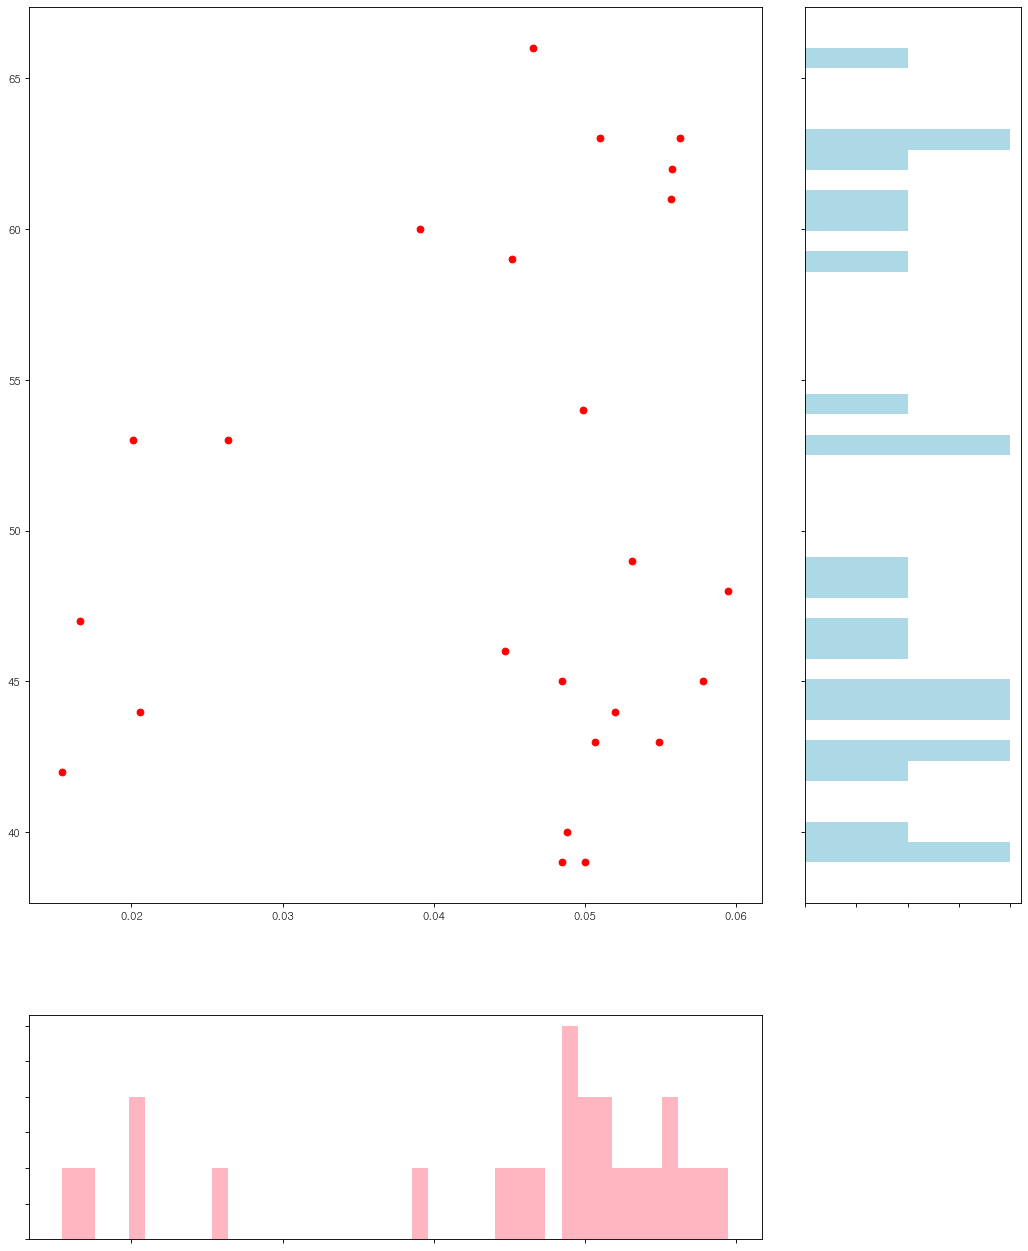

In [47]:
fig = plt.figure(figsize=(16,20),dpi = 80)
grid = plt.GridSpec(4,4,hspace=0.5,wspace=0.20)

ax_main = fig.add_subplot(grid[:-1,:-1])
ax_right = fig.add_subplot(grid[:-1,-1], xticklabels = [], yticklabels = [])
ax_bottom = fig.add_subplot(grid[-1,0:-1], xticklabels = [], yticklabels = [])

ax_main.scatter('NO2','PM10',color = 'r',data = df)
ax_right.hist(df.PM10,40, orientation = 'horizontal', color = 'lightblue')
ax_bottom.hist(df.NO2,40, orientation = 'vertical', color = 'lightpink')

In [48]:
conn = connect_mysql()

In [49]:
query = 'select * from lol_datas'

In [50]:
lol_df = pd.DataFrame(sql_execute_dict(conn,query))

In [52]:
my_df = lol_df[lol_df.gameId == 'KR_6606773837']

In [53]:
my_df

,gameId,gameDuration,gameVersion,summonerName,summonerLevel,participantId,championName,champExperience,teamPosition,teamId,...,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25
0,KR_6606773837,1105,13.14.520.6878,광년 일라오이,282,1,Shyvana,10434,TOP,100,...,6023,6501,8217,8471,0,0,0,0,0,0
1,KR_6606773837,1105,13.14.520.6878,아아에 얼음많이,41,2,Gragas,6226,UTILITY,100,...,4985,5366,6131,6338,0,0,0,0,0,0
2,KR_6606773837,1105,13.14.520.6878,킬각 Artist,191,3,Yone,9309,MIDDLE,100,...,6264,6711,7224,7805,0,0,0,0,0,0
3,KR_6606773837,1105,13.14.520.6878,mkim437,169,4,Varus,9336,BOTTOM,100,...,9960,10406,11095,11576,0,0,0,0,0,0
4,KR_6606773837,1105,13.14.520.6878,2024년7월8일,314,5,Sylas,9063,JUNGLE,100,...,6717,6918,7810,8164,0,0,0,0,0,0
5,KR_6606773837,1105,13.14.520.6878,무럭무럭 성장해,78,6,Aatrox,8742,TOP,200,...,6056,6178,6314,6366,0,0,0,0,0,0
6,KR_6606773837,1105,13.14.520.6878,뿌 숨,548,7,LeeSin,8228,JUNGLE,200,...,7095,7528,7759,7846,0,0,0,0,0,0
7,KR_6606773837,1105,13.14.520.6878,미드다운모습,88,8,Ryze,9006,MIDDLE,200,...,5759,6202,6498,6550,0,0,0,0,0,0
8,KR_6606773837,1105,13.14.520.6878,Vall,86,9,Twitch,5251,BOTTOM,200,...,4622,4848,5038,5090,0,0,0,0,0,0
9,KR_6606773837,1105,13.14.520.6878,노답이면 차단,211,10,Nautilus,5129,UTILITY,200,...,3632,3908,4164,4224,0,0,0,0,0,0


In [54]:
my_df.set_index('championName',inplace=True)

In [55]:
my_df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'champExperience', 'teamPosition',
       'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25'],
      dtype='object')

In [57]:
damage = my_df['totalDamageDealtToChampions']

In [59]:
import numpy as np

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Shyvana'),
  Text(1, 0, 'Gragas'),
  Text(2, 0, 'Yone'),
  Text(3, 0, 'Varus'),
  Text(4, 0, 'Sylas'),
  Text(5, 0, 'Aatrox'),
  Text(6, 0, 'LeeSin'),
  Text(7, 0, 'Ryze'),
  Text(8, 0, 'Twitch'),
  Text(9, 0, 'Nautilus')])

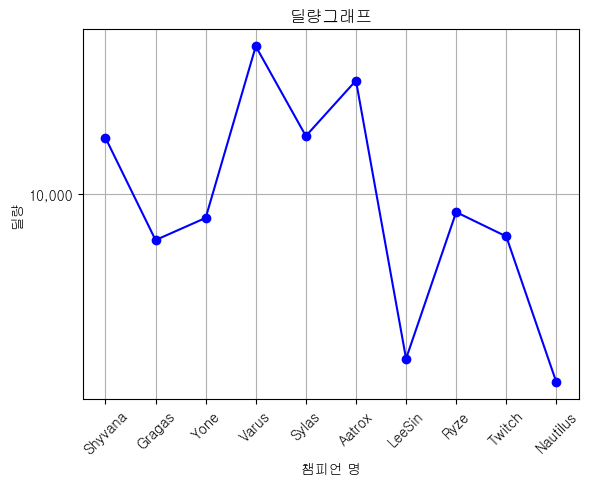

In [61]:
yticks_interval = 10000
maxlim = int((damage.max()/yticks_interval+1)) * yticks_interval
values = np.arange(0, maxlim + 1 , yticks_interval)
plt.yticks(values,["%s"% format(val,',') for val in values])
plt.plot(damage,color = 'blue',marker = 'o')
plt.grid(True)
plt.title('딜량그래프')
plt.xlabel('챔피언 명')
plt.ylabel('딜량')
plt.xticks(rotation = 45)

In [63]:
int(damage.max()/yticks_interval+1)

2

In [64]:
tmp_df = lol_df[['teamPosition','totalDamageDealtToChampions','totalDamageTaken','g_15']]

In [65]:
tmp_df2 = tmp_df[tmp_df.teamPosition != '']

In [67]:
jungle_df = tmp_df2[tmp_df2.teamPosition == 'JUNGLE']

In [68]:
jungle_df

,teamPosition,totalDamageDealtToChampions,totalDamageTaken,g_15
4,JUNGLE,11772,20831,6310
6,JUNGLE,4986,17930,6705
11,JUNGLE,10069,10507,6966
16,JUNGLE,3550,18705,4716
21,JUNGLE,32635,25805,6578
...,...,...,...,...
35980,JUNGLE,10125,12472,7376
35985,JUNGLE,7446,13676,7025
35990,JUNGLE,4944,12468,5670
35995,JUNGLE,3489,21692,4353


In [76]:
xdata = jungle_df.g_15
ydata = jungle_df.totalDamageDealtToChampions
ydata2 = jungle_df.totalDamageTaken

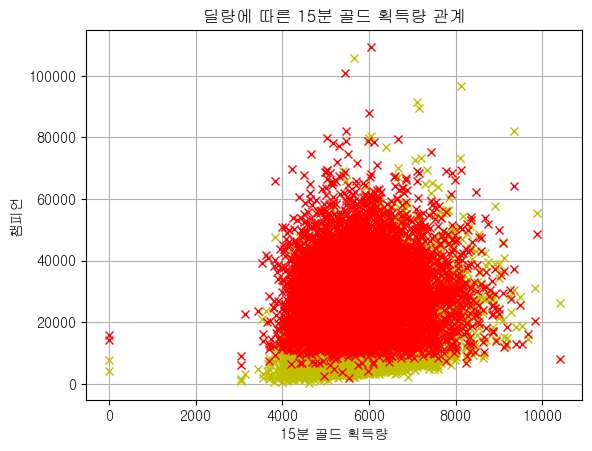

In [77]:
plt.figure()
plt.plot(xdata,ydata,color='y',marker='x',linestyle='none')
plt.plot(xdata,ydata2,color='r',marker='x',linestyle='none')
plt.xlabel('15분 골드 획득량')
plt.ylabel('챔피언')
plt.title('딜량에 따른 15분 골드 획득량 관계')
plt.grid(True)

In [89]:
group_df = tmp_df2.groupby('teamPosition').mean().round().reset_index()

In [90]:
group_df

,teamPosition,totalDamageDealtToChampions,totalDamageTaken,g_15
0,BOTTOM,21603.0,19207.0,5938.0
1,JUNGLE,17440.0,30225.0,5810.0
2,MIDDLE,21485.0,22210.0,5660.0
3,TOP,20740.0,28551.0,5471.0
4,UTILITY,10901.0,18358.0,4190.0


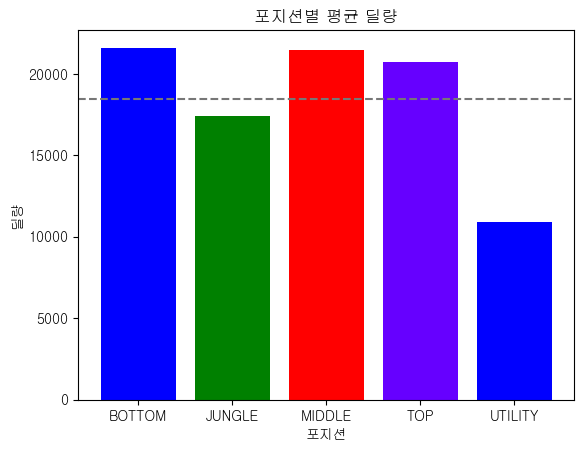

In [91]:
plt.figure()
plt.bar(group_df.teamPosition,group_df.totalDamageDealtToChampions,color= ['b','g','r','#6600FF'])
plt.xlabel('포지션')
plt.ylabel('딜량')
plt.title('포지션별 평균 딜량')

mean_val = group_df.totalDamageDealtToChampions.mean()
plt.axhline(y = mean_val, color = '#777777',linestyle='dashed')